In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r'..\data\HR_capstone_dataset.csv')

## Data Exploration

Como eu não conheço o dataset, vou fazer uma exploração inicial para entender melhor os dados.
Passos:

1. Carregar o dataset.
2. Verificar as primeiras linhas.
3. Verificar o tipo de dados de cada coluna (Para um possível modelo de previsão, é importante que as colunas de interesse estejam no formato numérico).
4. Verificar se há valores ausentes, dependendo do modelo de previsão, pode ser necessário lidar com esses valores.
5. Verificar distribuições, outliers e correlações entre as variáveis.

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Primeiras impressões

1. Aparentemente minha variável alvo será a coluna `left` que significa se o funcionário deixou a empresa ou não.
## Descrição das Variáveis

### Variáveis Numéricas
- **satisfaction_level**: Nível de satisfação do funcionário
- **last_evaluation**: Última avaliação de desempenho
- **number_project**: Número de projetos atribuídos
- **average_montly_hours**: Média de horas mensais trabalhadas
- **time_spend_company**: Tempo na empresa (anos)

### Variáveis Binárias
- **Work_accident**: Se teve acidente de trabalho (0/1)
- **left**: Se deixou a empresa (variável alvo)
- **promotion_last_5years**: Se teve promoção nos últimos 5 anos (0/1)

### Variáveis Categóricas
- **Department**: Departamento do funcionário
- **salary**: Nível salarial (low, medium, high)

In [8]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Como a maioria das colunas estão no formato numérico, as únicas que precisarei lidar serão as colunas `Department` e `salary`, que são categóricas. Mas isso será feito mais adiante, quando eu for preparar os dados para o modelo de previsão.

In [9]:
data.shape
# Como cada linha representa um funcionário, há 14999 respostas nessa pesquisa.

(14999, 10)

In [10]:
#Ferramentas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.set_theme(
    style="whitegrid",       # Fundo branco com grades discretas
    palette="muted",       # Cores suaves e bonitas
    font="sans-serif",      # Fonte limpa e moderna
    font_scale=1.1,         # Texto um pouco maior para melhor legibilidade
    rc={
        "axes.facecolor": "#f9f9f9",  # Cor de fundo do gráfico (cinza claro)
        "grid.color": "white",        # Cor das grades
        "axes.edgecolor": "0.3",      # Cor da borda do gráfico (cinza escuro)
    }
)

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

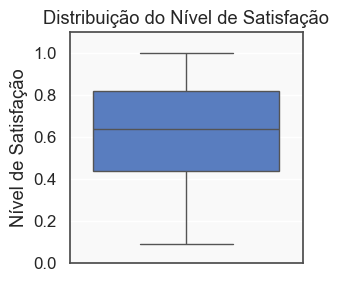

In [12]:
display(data['satisfaction_level'].describe())
plt.figure(figsize=(3, 3))
sns.boxplot(data=data, y='satisfaction_level')
plt.title('Distribuição do Nível de Satisfação')
plt.ylabel('Nível de Satisfação')
plt.ylim(0,1.1)
plt.show()

De forma geral o nível de satisfação não está muito bom, a média é de 0.61, e 75% dos funcionários estão avaliando abaixo de 0.82, pra uma empresa com 15 mil funcionários, isso é um número preocupante.

<Axes: xlabel='salary', ylabel='satisfaction_level'>

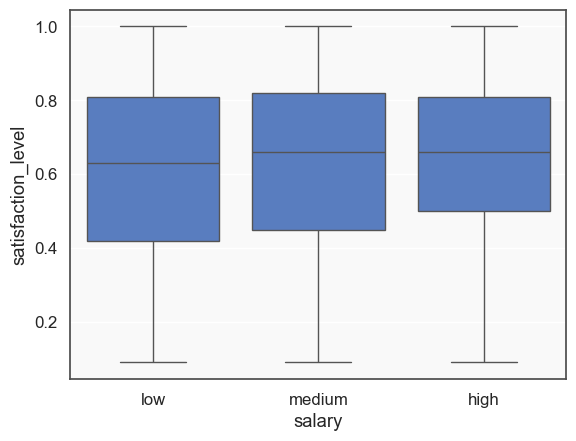

In [13]:
sns.boxplot(x='salary', y='satisfaction_level', data=data)  

A primeira vista, a satisfação não parece ser muito afetada pelo nível de salário. Suas médias estão próximas.

<Axes: xlabel='left', ylabel='satisfaction_level'>

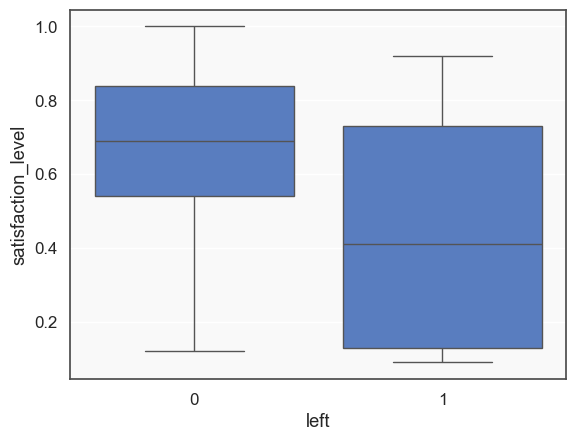

In [14]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

É bem aparente que o nível de satisfação é diferente entre as pessoas que saíram da empresa e as que não saíram. A média de satisfação das pessoas que saíram é bem menor do que a das que ficaram.
O que talvez já fosse de se esperar, mas é interessante ver isso nos dados.

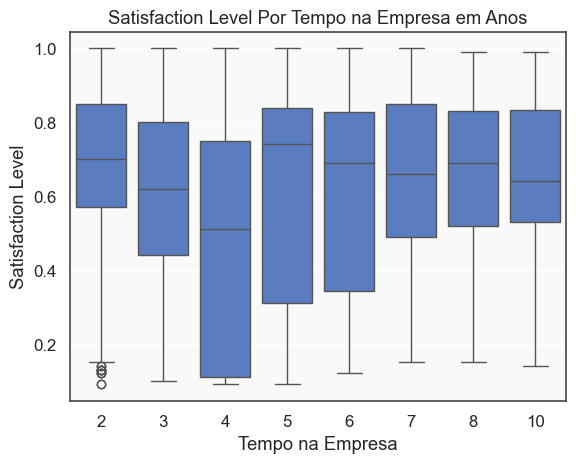

In [15]:
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=data)
plt.title('Satisfaction Level Por Tempo na Empresa em Anos')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Satisfaction Level')
plt.show()

Vamos dar uma olhada mais aprofundada nesses funcionários que estão há 4 anos na empresa. E tentar entender melhor o que pode ter levado eles a ter uma impressão pior da empresa.

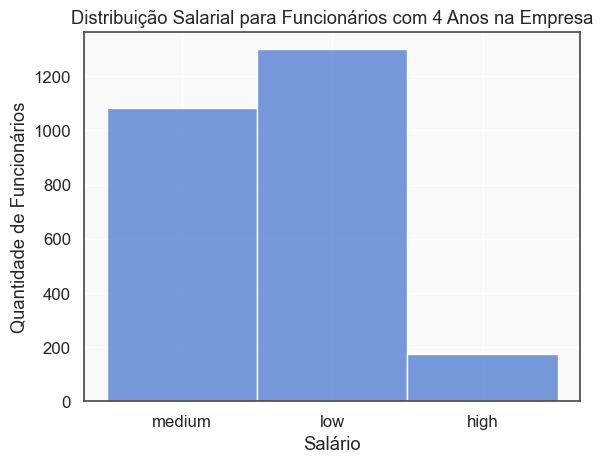

In [16]:
sns.histplot(data=data[data['time_spend_company'] == 4], x='salary', stat='count')
plt.title('Distribuição Salarial para Funcionários com 4 Anos na Empresa')
plt.xlabel('Salário')
plt.ylabel('Quantidade de Funcionários')
plt.show()

Pode se perceber que os funcionários que estão há 4 anos na empresa possuem ou possuíam salários baixos ou médios. Isso pode ser um indicativo de que esses funcionários não estão satisfeitos com o salário e isso pode ter influenciado na sua decisão de sair da empresa.

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Dado a diferença na satisfação dos funcionários com 4 anos de empresa, quero comparar algumas variáveis entre os funcionários que têm 4 anos de empresa e os demais.

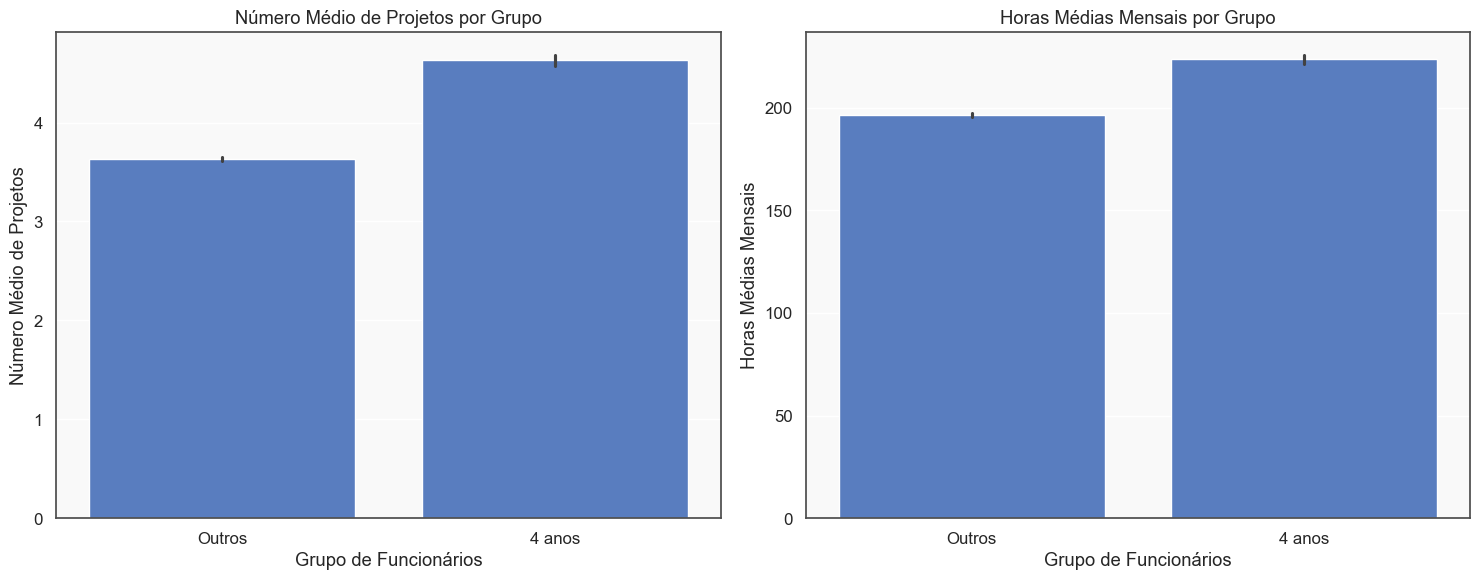

In [18]:
# Criar uma nova coluna para categorizar os funcionários
data['group_4_years'] = data['time_spend_company'].apply(lambda x: '4 anos' if x == 4 else 'Outros')

# Criar subplots para comparar as duas métricas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Número médio de projetos
sns.barplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Número Médio de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcionários')
axes[0].set_ylabel('Número Médio de Projetos')

# Gráfico 2: Horas médias trabalhadas
sns.barplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Horas Médias Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcionários')
axes[1].set_ylabel('Horas Médias Mensais')

plt.tight_layout()
plt.show()

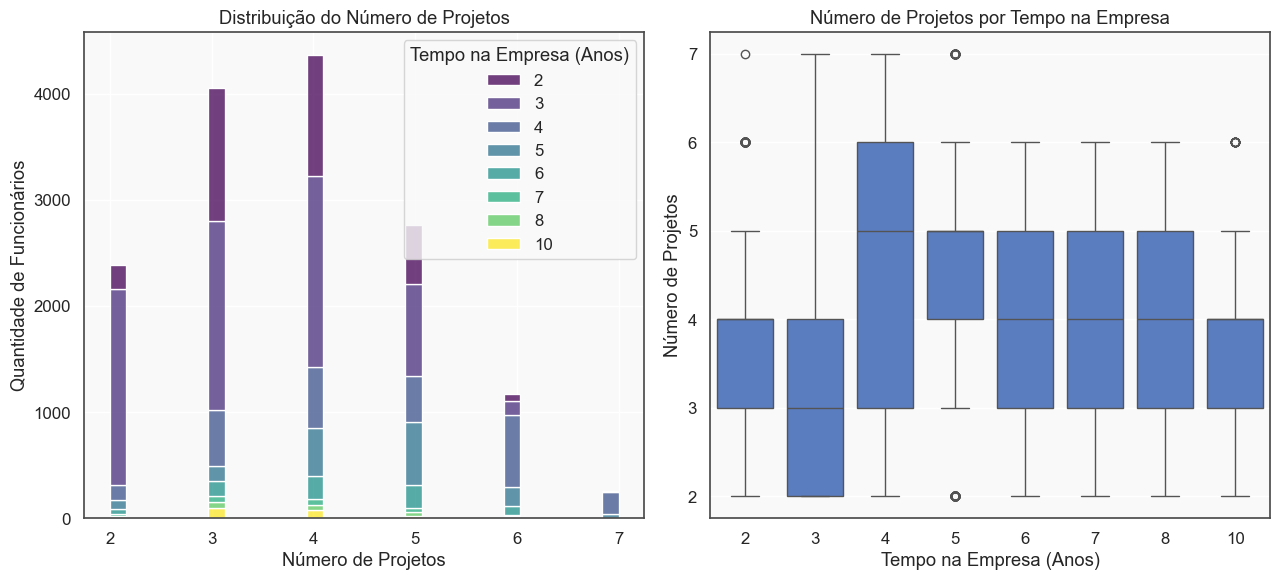

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Gráfico 1: Número médio de projetos
sns.histplot(data=data, x='number_project', ax=axes[0], hue='time_spend_company', multiple='stack', palette='viridis')
leg = axes[0].get_legend()
if leg:
    leg.set_title('Tempo na Empresa (Anos)')
axes[0].set_title('Distribuição do Número de Projetos')
axes[0].set_title('Distribuição do Número de Projetos')
axes[0].set_xlabel('Número de Projetos')
axes[0].set_ylabel('Quantidade de Funcionários')

# Gráfico 2: Horas médias trabalhadas
sns.boxplot(x='time_spend_company', y='number_project', data=data, ax=axes[1])
axes[1].set_title('Número de Projetos por Tempo na Empresa')
axes[1].set_xlabel('Tempo na Empresa (Anos)')
axes[1].set_ylabel('Número de Projetos')
plt.tight_layout()
plt.show()

In [20]:
data.groupby('Department').agg({'number_project': 'sum'}).sort_values('number_project', ascending=False)

,number_project
Department,
sales,15634
technical,10548
support,8479
IT,4683
product_mng,3434
marketing,3164
RandD,3033
accounting,2934
hr,2701


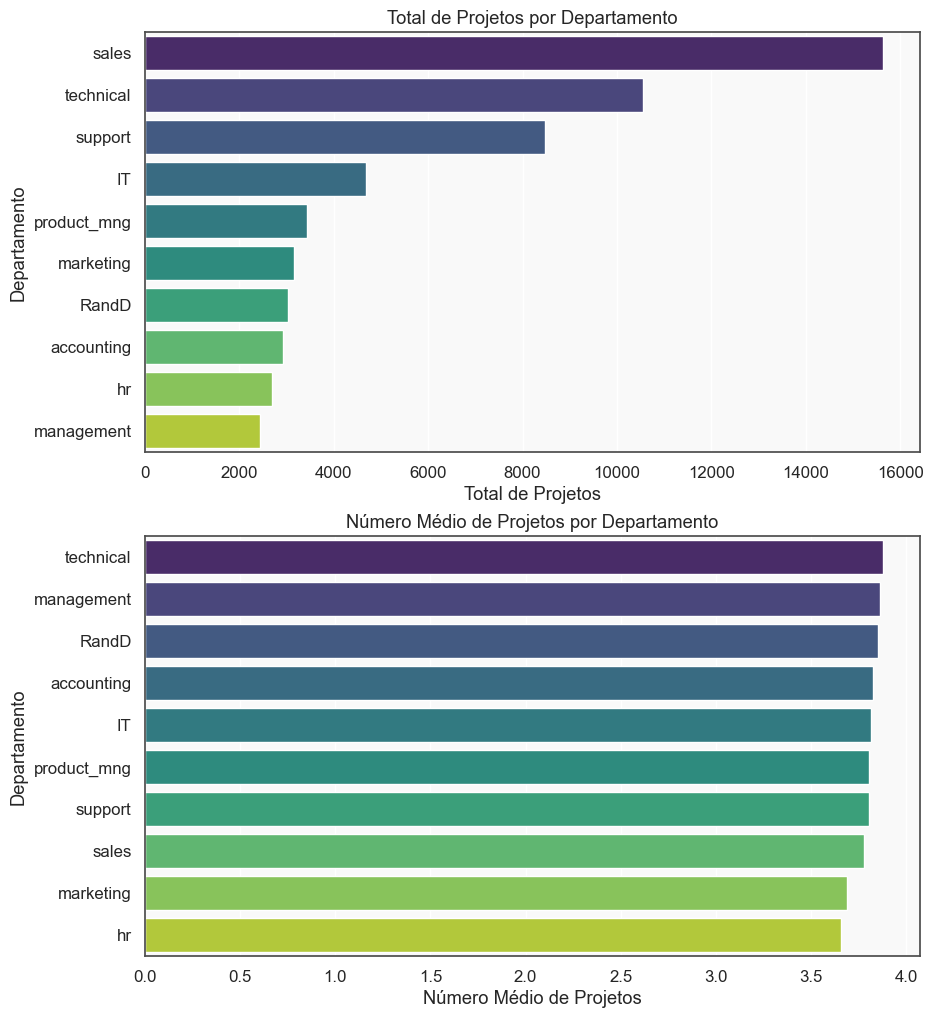

In [21]:
#Criando os objetos de visualização
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

#Primeiro gráfico: Total de Projetos por Departamento
sns.barplot(data=data.groupby('Department').agg({'number_project': 'sum'}).sort_values('number_project', ascending=False), y='Department', x='number_project', hue='Department', legend=False, errorbar=None, ax=axes[0], palette='viridis')
axes[0].set_title('Total de Projetos por Departamento')
axes[0].set_xlabel('Total de Projetos')
axes[0].set_ylabel('Departamento')

#Segundo gráfico: Número médio de projetos por departamento
sns.barplot(data=data.groupby('Department').agg({'number_project': 'mean'}).sort_values('number_project', ascending=False), y='Department', x='number_project', hue='Department', legend=False, errorbar=None, ax=axes[1], palette='viridis')
axes[1].set_title('Número Médio de Projetos por Departamento')
axes[1].set_xlabel('Número Médio de Projetos')
axes[1].set_ylabel('Departamento')
plt.show()


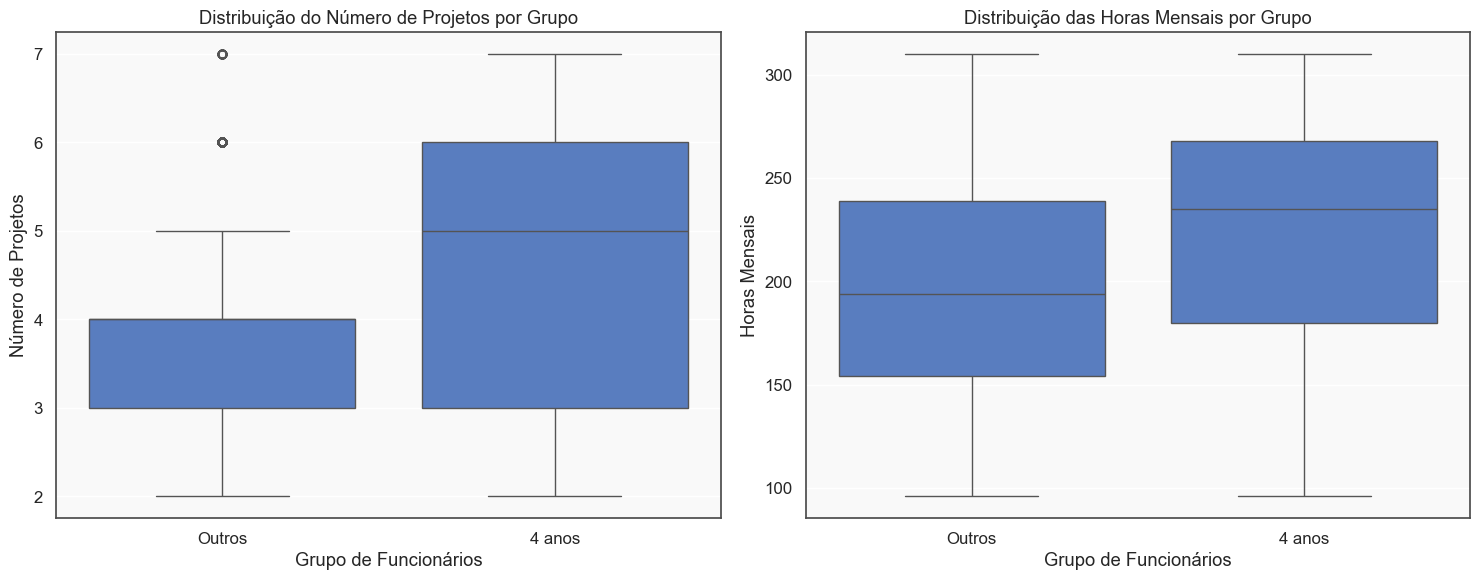

In [22]:
# Boxplots para ver a distribuição completa, não apenas as médias
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot 1: Número de projetos
sns.boxplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Distribuição do Número de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcionários')
axes[0].set_ylabel('Número de Projetos')

# Boxplot 2: Horas trabalhadas
sns.boxplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Distribuição das Horas Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcionários')
axes[1].set_ylabel('Horas Mensais')

plt.tight_layout()
plt.show()

💡 A partir destes dois gráficos é possível afirmar que os funcionários que estão há 4 anos na empresa possuem uma média de horas mensais trabalhadas maior do que os demais funcionários. Isso pode ser um indicativo de que esses funcionários estão trabalhando mais horas do que os demais e isso pode ter influenciado na sua decisão de sair da empresa, por acharem injusto trabalhar mais horas e receber o mesmo salário ou até menor do que os demais funcionários. 

Vamos investigar se há uma relação entre esses funcionários e a quantidade de pessoas que saem da empresa.

Taxa de Rotatividade por Grupo:
Funcionários com 4 anos: 34.8%
Outros funcionários: 21.5%


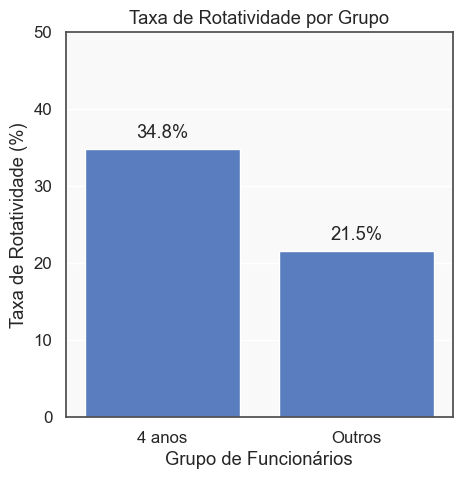

In [23]:
# Calcular a taxa de rotatividade para cada grupo
rotation_rate = data.groupby('group_4_years')['left'].agg(['count', 'sum']).reset_index()
rotation_rate['retention_rate'] = (rotation_rate['count'] - rotation_rate['sum']) / rotation_rate['count'] * 100
rotation_rate['turnover_rate'] = rotation_rate['sum'] / rotation_rate['count'] * 100

print("Taxa de Rotatividade por Grupo:")
print(f"Funcionários com 4 anos: {rotation_rate[rotation_rate['group_4_years'] == '4 anos']['turnover_rate'].iloc[0]:.1f}%")
print(f"Outros funcionários: {rotation_rate[rotation_rate['group_4_years'] == 'Outros']['turnover_rate'].iloc[0]:.1f}%")

# Visualizar
plt.figure(figsize=(5, 5))
sns.barplot(data=rotation_rate, x='group_4_years', y='turnover_rate')
plt.title('Taxa de Rotatividade por Grupo')
plt.ylabel('Taxa de Rotatividade (%)')
plt.xlabel('Grupo de Funcionários')
plt.ylim(0, 50)

# Adicionar valores nas barras
for i, v in enumerate(rotation_rate['turnover_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

⚠️ Pra finalizar a conclusão, podemos afirmar que funcionários que estão a 4 anos na empresa, tem uma taxa de saída maior do que os demais funcionários. E o motivo não é apenas o tempo de empresa mas o fato de que estes colaboradores estarem trabalhando mais e seus salários não são proporcionais a isso, principalmente se eles se compararem aos outros.

In [24]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Outros


In [25]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

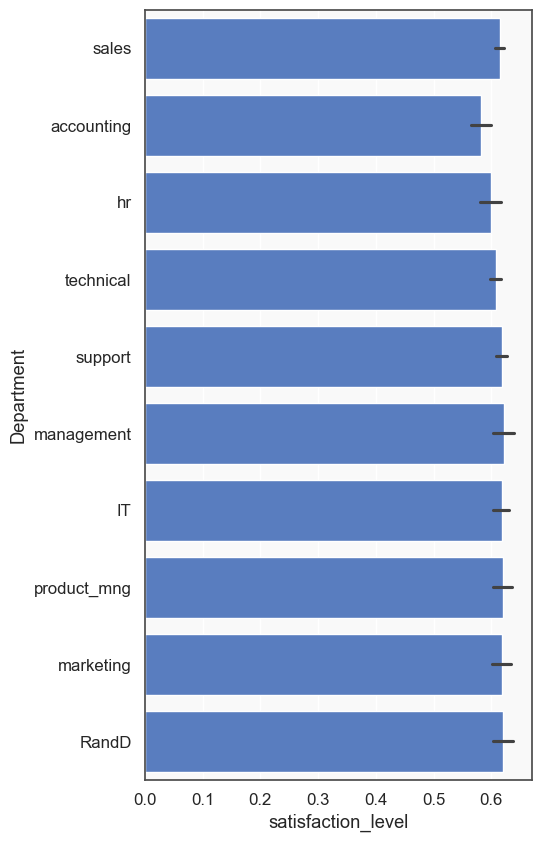

In [26]:
plt.figure(figsize=(5, 10))
sns.barplot(data=data, y='Department', x='satisfaction_level')
plt.show()

Aqui pode-se ver que o nível de satisfação entre os diferentes setores da empresa é bem similar. O departamento "Accounting" tem uma satisfação geral menor, porém não talvez suficientemente para decretar que há um problema.
Porém, vamos verificar especificamente para os funcionários que estão há 4 anos na empresa, para ver se há alguma diferença significativa entre os setores.

In [27]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

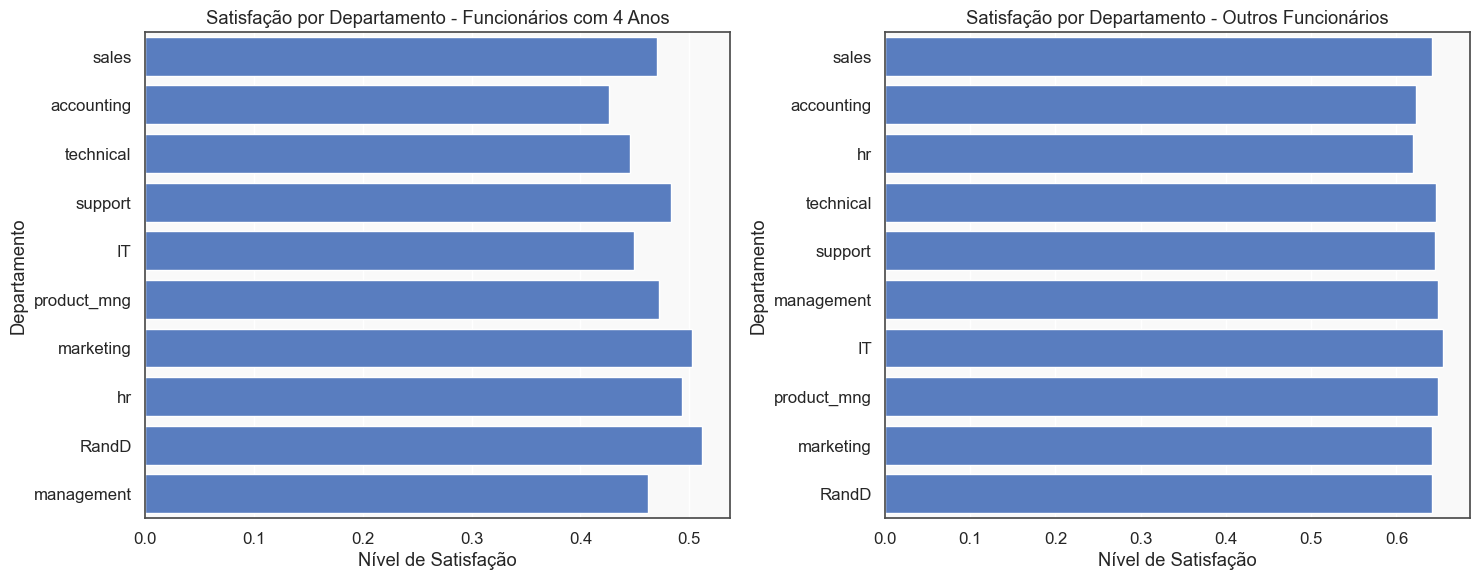

In [28]:
# Comparar satisfação entre funcionários com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos de empresa
sns.barplot(data=data[data['time_spend_company']==4], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfação por Departamento - Funcionários com 4 Anos')
axes[0].set_xlabel('Nível de Satisfação')
axes[0].set_ylabel('Departamento')

# Gráfico 2: Outros funcionários (não 4 anos)
sns.barplot(data=data[data['time_spend_company']!=4], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfação por Departamento - Outros Funcionários')
axes[1].set_xlabel('Nível de Satisfação')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

Aqui, apesar de o nível de satisfação entre os funcionários que estão há 4 anos na empresa dentre os setores ser similar, podemos ver que está abaixo de `0.5` em praticamente todos os setores. Então pode-se afirmar que os funcionários que estão há 4 anos na empresa estão insatisfeitos com a empresa, independente do setor.

Porém de forma geral, um nível de satisfação abaixo de `0.8` já é um indicativo de que o funcionário não está satisfeito com a empresa. Então, mesmo que o nível de satisfação esteja acima de `0.5`, ainda assim é um indicativo de que os funcionários estão insatisfeitos com a empresa.

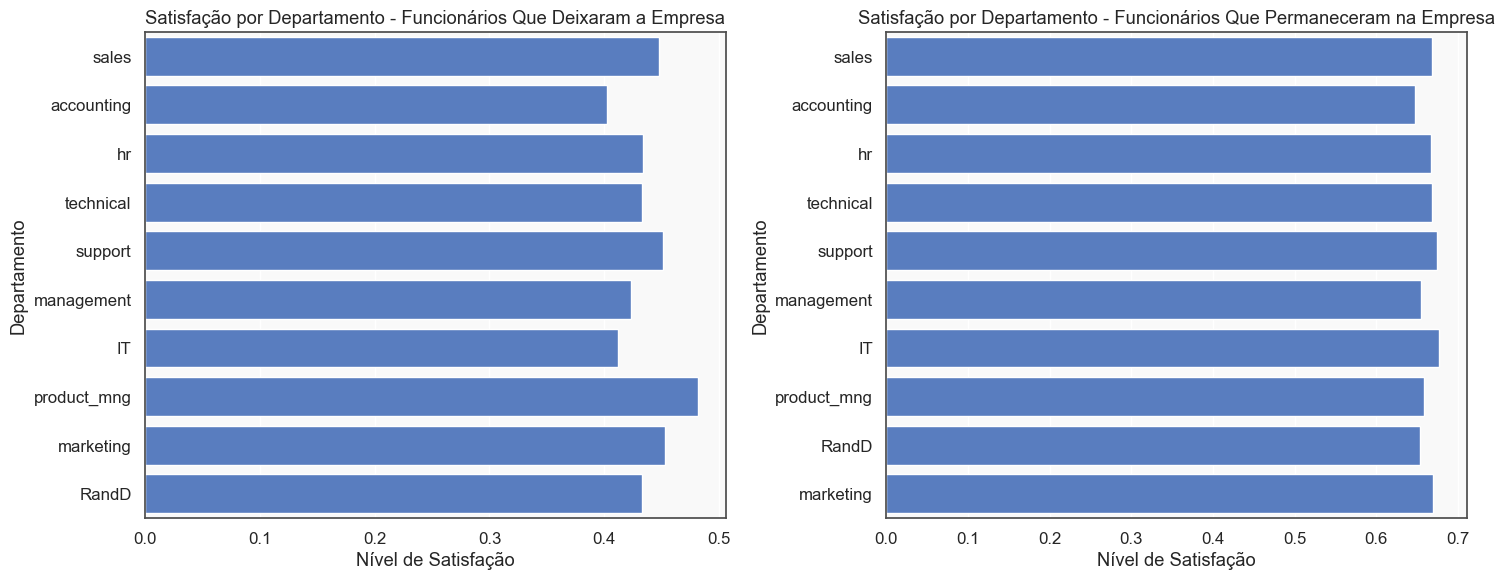

In [29]:
# Comparar satisfação entre funcionários com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos de empresa
sns.barplot(data=data[data['left']==1], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfação por Departamento - Funcionários Que Deixaram a Empresa')
axes[0].set_xlabel('Nível de Satisfação')
axes[0].set_ylabel('Departamento')

# Gráfico 2: Outros funcionários (não 4 anos)
sns.barplot(data=data[data['left']!=1], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfação por Departamento - Funcionários Que Permaneceram na Empresa')
axes[1].set_xlabel('Nível de Satisfação')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

In [30]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
3,0.72,0.87,5,223,5,0,1,0,sales,low,Outros
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros


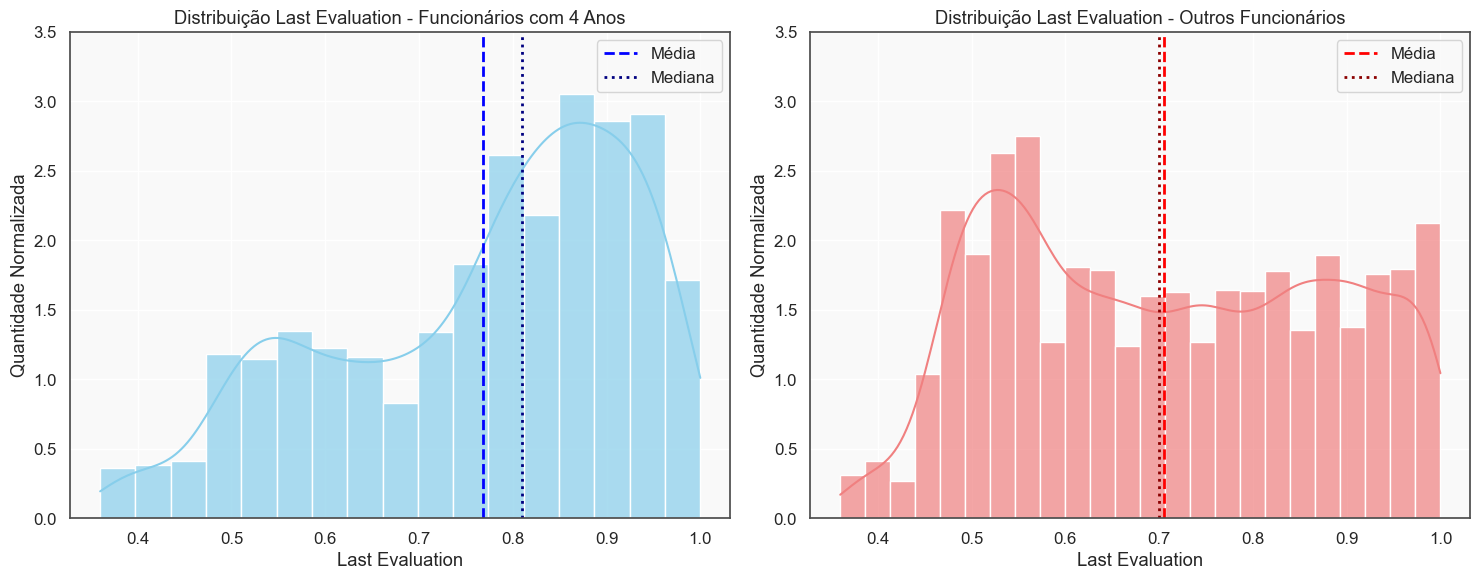

In [31]:
# Comparar last_evaluation entre os grupos com densidade normalizada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos
sns.histplot(data=data[data['time_spend_company']==4], x='last_evaluation', 
             stat='density', ax=axes[0], color='skyblue', alpha=0.7, kde=True)
#Aqui foi usado o parâmetro `stat='density'` para normalizar a quantidade de funcionários, permitindo uma comparação justa entre os grupos.
axes[0].set_title('Distribuição Last Evaluation - Funcionários com 4 Anos')
axes[0].set_xlabel('Last Evaluation')
axes[0].set_ylabel('Quantidade Normalizada')
axes[0].set_ylim((0, 3.5)) # Forçar o limite do eixo y para melhor visualização e igualar escalas

# Média e mediana para funcionários com 4 anos
media_4 = data[data['time_spend_company']==4]['last_evaluation'].mean()
mediana_4 = data[data['time_spend_company']==4]['last_evaluation'].median()
axes[0].axvline(media_4, color='blue', linestyle='--', linewidth=2, label='Média')
axes[0].axvline(mediana_4, color='navy', linestyle=':', linewidth=2, label='Mediana')
axes[0].legend()

# Gráfico 2: Outros funcionários
sns.histplot(data=data[data['time_spend_company']!=4], x='last_evaluation', 
             stat='density', ax=axes[1], color='lightcoral', alpha=0.7, kde=True)
axes[1].set_title('Distribuição Last Evaluation - Outros Funcionários')
axes[1].set_xlabel('Last Evaluation')
axes[1].set_ylabel('Quantidade Normalizada')
axes[1].set_ylim((0, 3.5))  # Forçar o limite do eixo y para melhor visualização e igualar escalas

# Média e mediana para outros funcionários
media_outros = data[data['time_spend_company']!=4]['last_evaluation'].mean()
mediana_outros = data[data['time_spend_company']!=4]['last_evaluation'].median()
axes[1].axvline(media_outros, color='red', linestyle='--', linewidth=2, label='Média')
axes[1].axvline(mediana_outros, color='darkred', linestyle=':', linewidth=2, label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='left', ylabel='satisfaction_level'>

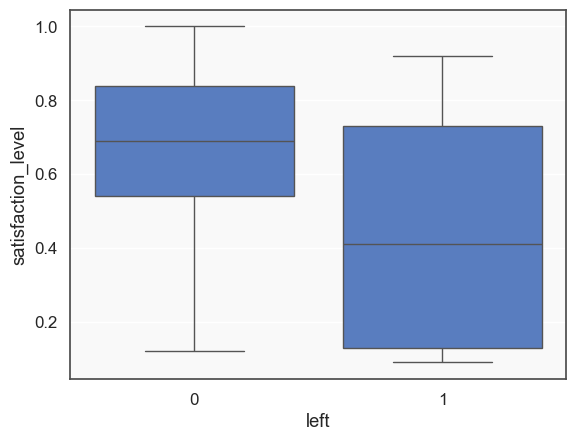

In [32]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

Apenas para questões de confirmação, o boxplot acima confirma que funcionários que deixaram a empresa possuem uma média de satisfação menor do que os que não deixaram. E isso é bem evidente, pois a média de satisfação dos funcionários que deixaram a empresa está abaixo de `0.5`, enquanto a média dos que não deixaram está acima de `0.5`.

Apesar de ser uma variável 'óbvia', irei construir o modelo utilizando-a e ver o que o modelo traz de insights.

Após os resultados, um novo modelo será criado sem essa variável para ver se há alguma diferença significativa nos resultados.

<Axes: xlabel='time_spend_company', ylabel='Count'>

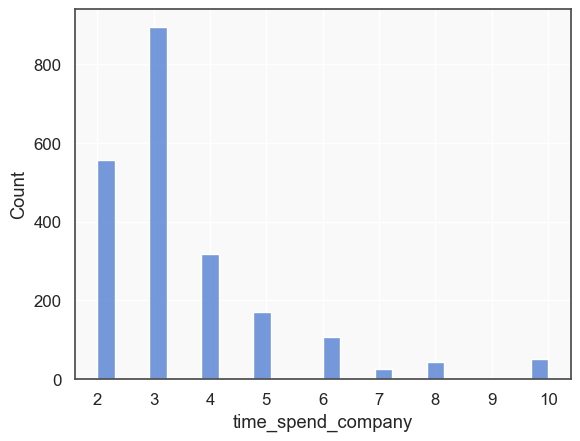

In [33]:
sns.histplot( data=data[ data['Work_accident'] ==1 ], x='time_spend_company', stat='count')

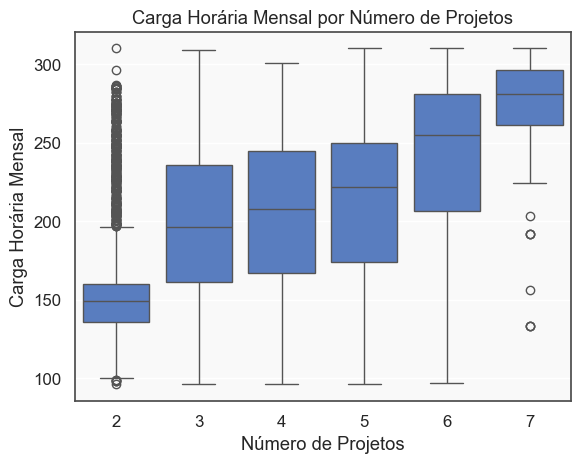

In [34]:
#Como esperado quanto maior o número de projetos, maior a carga horária mensal.
sns.boxplot(data=data, x='number_project', y='average_montly_hours')
plt.title('Carga Horária Mensal por Número de Projetos')
plt.xlabel('Número de Projetos')
plt.ylabel('Carga Horária Mensal')
plt.show()

In [35]:
#Verificando o balanceamento da variável 'left' que é a variável alvo do modelo.
data['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

## Decision Tree

A ideia agora é criar um modelo de previsão para tentar prever se um funcionário vai deixar a empresa ou não, baseado nas variáveis disponíveis.
Para isso, vamos utilizar o algoritmo de Decision Tree, que é um algoritmo de aprendizado de máquina que cria uma árvore de decisão para classificar os dados.

Isso poderá ajudar a empresa a identificar antecipadamente a saída de um funcionário e tomar medidas para evitar isso, como oferecer um aumento salarial, uma promoção ou até mesmo uma mudança de setor.

Por quê decision tree?
- É um algoritmo simples e fácil de entender.
- É um algoritmo que lida bem com dados desbalanceados.
- É um algoritmo que pode lidar com dados categóricos e numéricos.

O objetivo é entender quais as variáveis mais importantes para prever a saída de um funcionário.

⚠️ Apesar de haver um desequilíbrio no dataset de pessoas que deixaram e não deixaram a empresa (80/20), usando random forest, podemos lidar com isso. O algoritmo de random forest é robusto o suficiente para lidar com esse tipo de desequilíbrio.

In [36]:
#Imports:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Pra relembrar a estrutura dos dados.
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
3,0.72,0.87,5,223,5,0,1,0,sales,low,Outros
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros


In [38]:
data.dtypes
#Conferindo os tipos de dados, todos estão corretos para o modelo de machine learning.

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
group_4_years             object
dtype: object

As colunas `Department` e `salary` são categóricas, então precisamos transformá-las em variáveis numéricas para que o modelo possa utilizá-las. Para isso, vamos utilizar o método `get_dummies` do pandas, que cria variáveis dummy (0/1) para cada categoria.

In [39]:
len(data['Department'].unique())

10

💭 Pensando melhor, quando olhei para o nível de satisfação dos funcionários entre os departamentos, elas eram bem semelhantes.
Dessa forma não irei utilizar o departamento como uma variável de entrada para o modelo, pois não parece ser uma variável relevante para a previsão da saída do funcionário.


In [40]:
#Irei utilizar uma outra variável pra deixar apenas as colunas de interesse para o modelo.
data_subset = data.drop(columns=['Department', 'group_4_years'])

In [41]:
data_subset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [42]:
data_subset = pd.get_dummies(data_subset, columns=['salary'], drop_first=True, dtype=int)
data_subset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [43]:
data_subset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary_low                 int64
salary_medium              int64
dtype: object

### Agora com todas as variáveis no formato numérico, podemos prosseguir com a criação do modelo de Decision Tree.

In [44]:
# # Define the y (target) variable
# y = churn_df['Exited']

# # Define the X (predictor) variables
# X = churn_df.copy()
# X = X.drop('Exited', axis=1)

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.25, stratify=y, 
#                                                     random_state=42)

#Vamos definir as variáveis, target e features.

y = data_subset['left']
X = data_subset.drop(columns=['left'], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)
#Aqui utilizo o argumento stratify para garantir que a proporção de classes (left) seja mantida tanto no conjunto de treino quanto no de teste.

In [46]:
#Iniciando o modelo de Random Forest
decision_tree = DecisionTreeClassifier(random_state=0)

# Ajustando o modelo aos dados de treino
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [47]:
#Para visualizar o modelo e métricas de performance:
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [48]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.977
Precision: 0.942
Recall: 0.963
F1 Score: 0.952


O modelo teve uma ótima performance geral, mas a métrica que interessa no momento é a `recall`, que é a capacidade do modelo de identificar corretamente os funcionários que saíram da empresa. A `recall` foi de `0.963`, o que significa que o modelo conseguiu identificar 96.3% dos funcionários que saíram da empresa. Isso é um ótimo resultado, pois significa que o modelo é capaz de identificar a grande maioria dos funcionários que saem da empresa.

In [49]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Aceita como argumento o objeto do modelo, os dados X (teste ou validação) e os dados y (teste ou validação).
    Retorna a matriz de confusão para as previsões nos dados y.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` para evitar notação científica
    plt.grid(False)  # Para melhor visibilidade
    plt.show()

In [50]:
X_test.shape

(3750, 9)

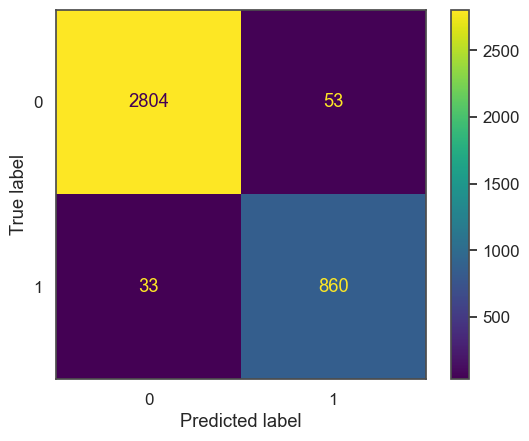

In [51]:
conf_matrix_plot(decision_tree, X_test, y_test)

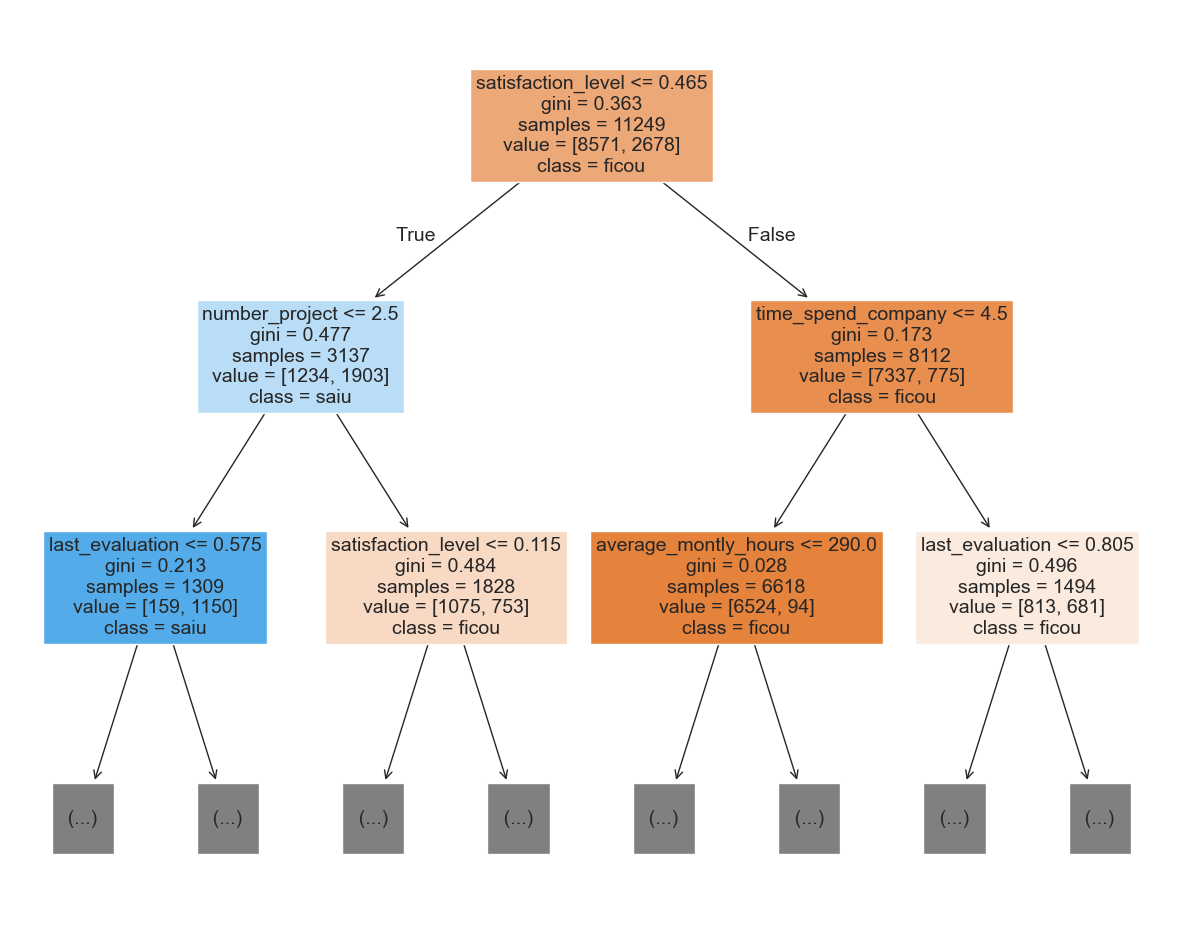

In [52]:
# Vamos ver a árvore de decisão do modelo, para entender melhor como ele está tomando as decisões.
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'ficou', 1:'saiu'}, filled=True);
plt.show()

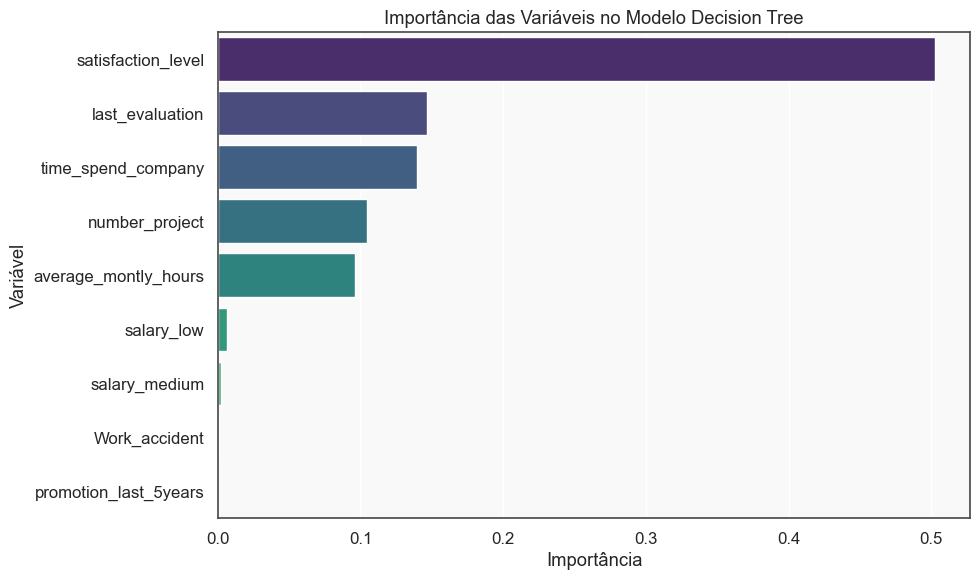

In [53]:
importances = decision_tree.feature_importances_
features = X.columns

# Ordena por importância
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis", hue=features[indices])
plt.title('Importância das Variáveis no Modelo Decision Tree')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Após o resultado do modelo, ficou claro o impacto da variável `satisfaction_level` na saída do funcionário. A variável `satisfaction_level` é a mais importante para prever se um funcionário vai deixar a empresa ou não, seguida por `last_evaluation` e `time_spend_company`.

Podemos ver também que as variáveis `salary_low` e `salary_medium` não possuem um impacto significativo na saída do funcionário, o que pode indicar que o salário não é um fator determinante para a saída do funcionário assim como `Work_accident` e `promotion_last_5years`, que também não possuem um impacto significativo na saída do funcionário.

Porém, por ser uma variável muito óbvia na correlação com a saída do funcionário, talvez não seja interessante utilizar, pois ela pode talvez esconder outras variáveis que poderiam ser mais relevantes para a previsão da saída do funcionário.

A partir disso, vamos testar novamente o mesmo modelo, porém desconsiderando a variável `satisfaction_level` para ver se há alguma diferença significativa nas outras variáveis.

In [54]:
# Crie um novo conjunto de dados sem satisfaction_level
X_no_satisfaction = data_subset.drop(columns=['left', 'satisfaction_level'], axis=1)
y_no_satisfaction = data_subset['left']

# Separe treino e teste
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_no_satisfaction, y_no_satisfaction, test_size=0.25, stratify=y_no_satisfaction, random_state=42
)

# Novo modelo
decision_tree_ns = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree_ns.fit(X_train_ns, y_train_ns)
dt_pred_ns = decision_tree_ns.predict(X_test_ns)

# Avalie as métricas
print("Modelo sem satisfaction_level:")
print("Accuracy:", "%.3f" % accuracy_score(y_test_ns, dt_pred_ns))
print("Precision:", "%.3f" % precision_score(y_test_ns, dt_pred_ns))
print("Recall:", "%.3f" % recall_score(y_test_ns, dt_pred_ns))
print("F1 Score:", "%.3f" % f1_score(y_test_ns, dt_pred_ns))

Modelo sem satisfaction_level:
Accuracy: 0.944
Precision: 0.850
Recall: 0.931
F1 Score: 0.888


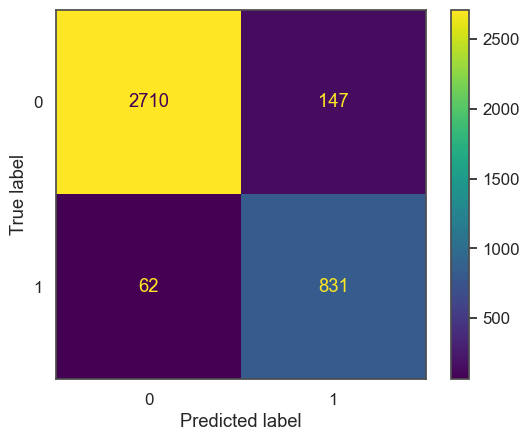

In [55]:
conf_matrix_plot(decision_tree_ns, X_test_ns, y_test_ns)

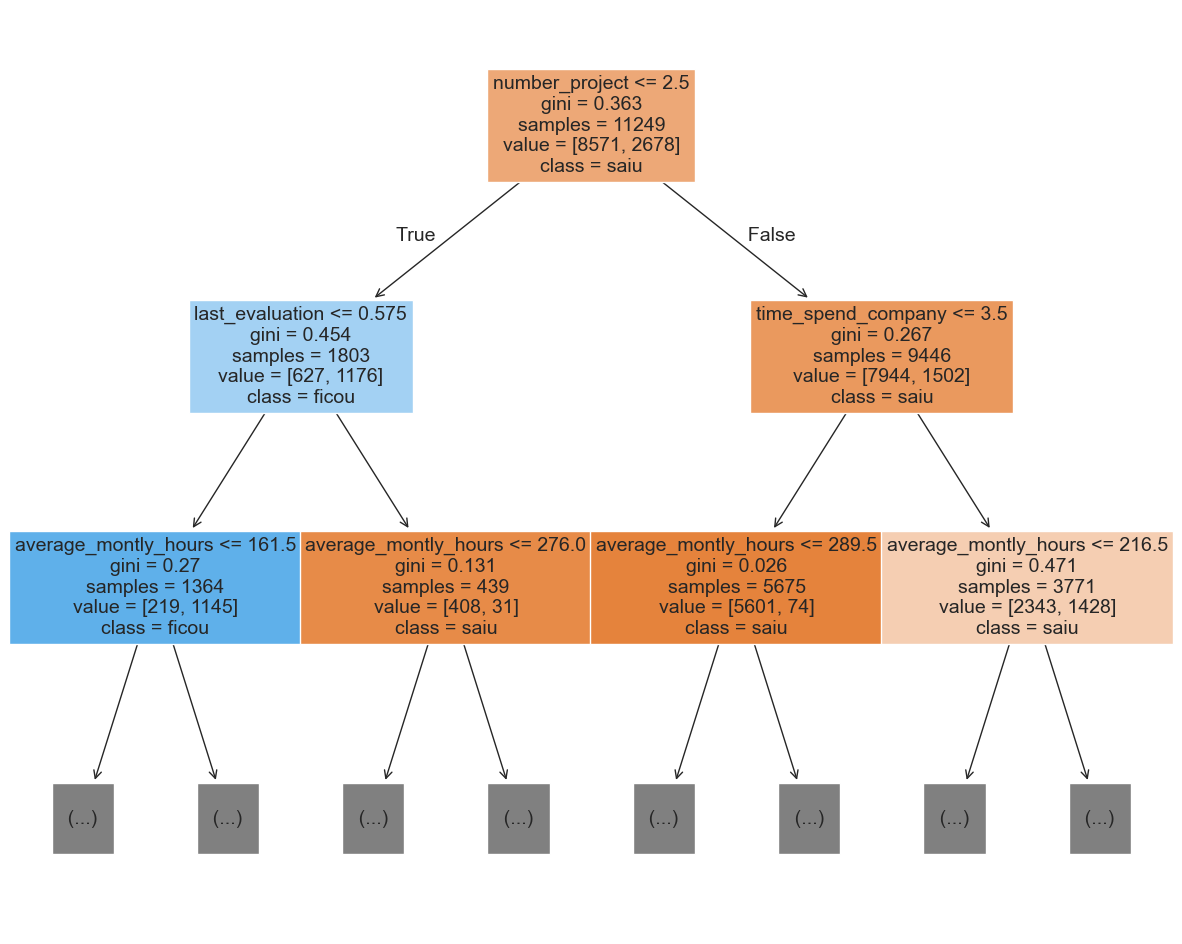

In [56]:
# Vamos ver a árvore de decisão do modelo, para entender melhor como ele está tomando as decisões.
plt.figure(figsize=(15,12))
plot_tree(decision_tree_ns, max_depth=2, fontsize=14, feature_names=X_no_satisfaction.columns, 
          class_names={0:'saiu', 1:'ficou'}, filled=True);
plt.show()

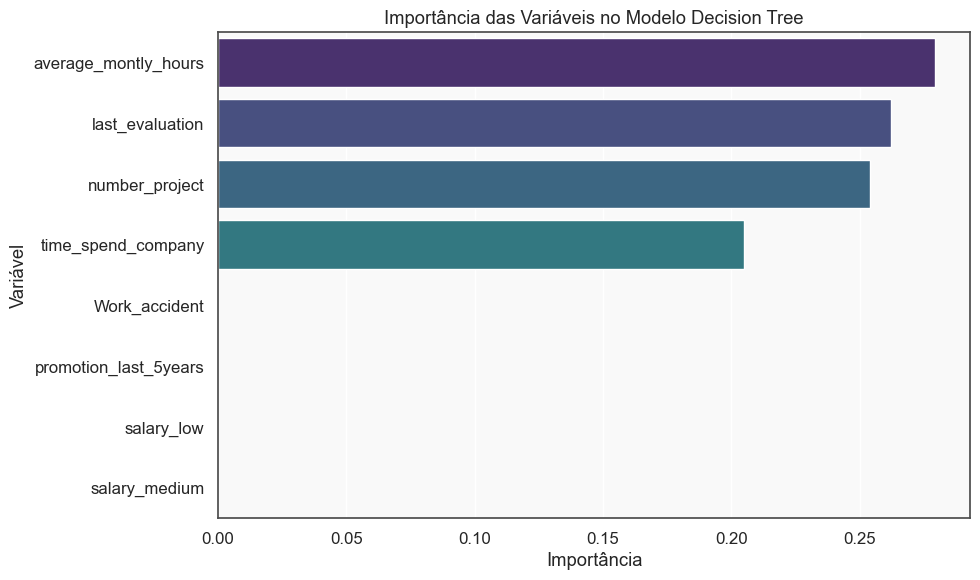

In [57]:
importances_ns = decision_tree_ns.feature_importances_
features_ns = X_no_satisfaction.columns

# Ordena por importância
indices = importances_ns.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_ns[indices], y=features_ns[indices], palette="viridis", hue=features_ns[indices])
plt.title('Importância das Variáveis no Modelo Decision Tree')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Dado o resultado do modelo, podemos ir para um modelo de regressão logística, que é um modelo mais simples e fácil de interpretar, que podemoos utilizar para indicar a probabilidade de um funcionário deixar a empresa ou não, e um possível impacto. Utilizaremos as variáveis `average_montly_hours`, `last_evaluation`, `number_project`, e `time_spend_company` visto que elas tiveram o maior impacto nesse primeiro modelo, sem considerar o nível de satisfação, que não será utilizado nesse segundo modelo. 

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
# Vamos calcular a importância das variáveis usando permutação, que é uma técnica 
# robusta para avaliar a importância das variáveis em modelos de machine learning.
# Começando pelo primeiro modelo, que inclui a variável 'satisfaction_level'.
results = permutation_importance(
    decision_tree, X_test, y_test,
    scoring='recall',   # utilizado recall, pelo interesse em identificar funcionários que saíram mesmo com o custo de possíveis falsos positivos.
    n_repeats=10,         # quantas permutações por feature
    random_state=42
)

# Extrair importâncias médias e desvios
importances = results.importances_mean
stds        = results.importances_std
feature_names = X_test.columns

# Exibir ranking
for name, mean_imp, std_imp in sorted(
        zip(feature_names, importances, stds),
        key=lambda x: x[1], reverse=True):
    print(f"{name}: {mean_imp:.3f} ± {std_imp:.3f}")


satisfaction_level: 0.603 ± 0.013
number_project: 0.517 ± 0.007
last_evaluation: 0.479 ± 0.010
average_montly_hours: 0.407 ± 0.014
time_spend_company: 0.229 ± 0.004
Work_accident: 0.007 ± 0.002
salary_low: 0.006 ± 0.002
salary_medium: 0.001 ± 0.001
promotion_last_5years: 0.000 ± 0.000


In [60]:


results = permutation_importance(
    decision_tree_ns, X_test_ns, y_test_ns,
    scoring='recall',   # utilizado recall, pelo interesse em identificar funcionários que saíram mesmo com o custo de possíveis falsos positivos.
    n_repeats=10,         # quantas permutações por feature
    random_state=42
)

# Extrair importâncias médias e desvios
importances = results.importances_mean
stds        = results.importances_std
feature_names = X_test_ns.columns

# Exibir ranking
for name, mean_imp, std_imp in sorted(
        zip(feature_names, importances, stds),
        key=lambda x: x[1], reverse=True):
    print(f"{name}: {mean_imp:.3f} ± {std_imp:.3f}")


last_evaluation: 0.586 ± 0.014
average_montly_hours: 0.556 ± 0.011
number_project: 0.423 ± 0.007
time_spend_company: 0.246 ± 0.008
Work_accident: 0.000 ± 0.000
promotion_last_5years: 0.000 ± 0.000
salary_low: 0.000 ± 0.000
salary_medium: 0.000 ± 0.000


### Feature Importance e Impacto das Variáveis

Os resultados acima nos dizem que na ordem, as variáveis mais importantes para prever se um funcionário vai deixar a empresa ou não são:

Usando Permutation Importance:

Com `satisfaction_level`:

1. satisfaction_level: 0.603 ± 0.013 (nível de impacto de cada variável)
2. number_project: 0.517 ± 0.007
3. last_evaluation: 0.479 ± 0.010
4. average_montly_hours: 0.407 ± 0.014
5. time_spend_company: 0.229 ± 0.004
6. Work_accident: 0.007 ± 0.002
7. salary_low: 0.006 ± 0.002
8. salary_medium: 0.001 ± 0.001
9. promotion_last_5years: 0.000 ± 0.000


Sem `satisfaction_level`:

1. last_evaluation: 0.586 ± 0.014
2. average_montly_hours: 0.556 ± 0.011
3. number_project: 0.423 ± 0.007
4. time_spend_company: 0.246 ± 0.008
5. Work_accident: 0.000 ± 0.000
6. promotion_last_5years: 0.000 ± 0.000
7. salary_low: 0.000 ± 0.000
8. salary_medium: 0.000 ± 0.000

Quando incluída, a variável __satisfaction_level__ possui um grande peso na importância do modelo, porém não há como agir diretamente sobre ela, então num segundo modelo ela foi retirada.
Com o 2 modelo treinado, a variável __last_evaluation__ tomou a frente seguida pela __average_montly_hours__ e __number_project__, que podemos simplificar e olhar apenas para o número de projetos, visto que as horas serão afetadas pela quantidade de projetos.

### Feature Importance

✅ O que mede:
Quanto uma variável contribuiu para dividir os dados ao longo da árvore.

🧠 Como funciona:
Mede a redução média de impureza (ex: Gini ou Entropia) cada vez que uma variável é usada como split.

Quanto mais uma variável é usada em divisões importantes (perto da raiz), maior sua importância.

⚠️ Limitações:
Não considera o impacto real na performance do modelo.

Tende a favorecer variáveis com mais categorias ou maior variância.

### Permutation Importance

✅ O que mede:
Quanto a performance do modelo cai quando embaralhamos uma variável, quebrando sua relação com o alvo.

🧠 Como funciona:
Embaralha os valores de uma variável por vez.

Mede o impacto disso na métrica escolhida (ex: recall, f1, accuracy).

Quanto maior a queda na métrica, mais importante é a variável.

⚠️ Vantagens:
Leva em conta o comportamento real do modelo treinado.

Pode mostrar que uma variável pouco usada na árvore ainda assim é decisiva para boas previsões.

## Por quê medir Recall?

A métrica `recall` é utilizada para medir a capacidade do modelo de identificar corretamente os funcionários que saíram da empresa (left = 1). Neste caso mesmo que houvesse um número considerável de falsos positivos, a ação de tentar manter um funcionário mesmo que não houvesse a essa intenção de sair, não é um grande problema, ainda estaríamos filtrando uma boa quantidade de pessoas, dado o resultado do modelo em prever verdadeiros positivos (funcionários que realmente saíram).

Relembrando o resultado do modelo: Recall foi `0.931`, onde o cálculo é dado por:

```
Recall = TP / (TP + FN)

Recall = 831 / (831+62) ≈ 0.9308

* Baseado na matriz confusão do modelo.

Ou seja, apenas `6,94%` ( 62/(831+62) ) que saíram não foram identificados pelo modelo, um número bem baixo.

```

#### Agora temos uma melhor ideia das variáveis que realmente impactam na saída de um funcionário. Podemos investigar um pouco mais diretamente essas variáveis. Pra isso criarei um novo dataframe apenas com as colunas de interesse, e a partir dele farei novas análises.

In [61]:
colunas = ['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'left']
data_filtered = data[colunas]
data_filtered.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left
0,0.38,0.53,2,3,1
1,0.80,0.86,5,6,1
2,0.11,0.88,7,4,1
3,0.72,0.87,5,5,1
4,0.37,0.52,2,3,1


In [62]:
#Vamos relembrar e olhar as estatísticas descritivas das colunas de interesse.
data_filtered.describe()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,3.498233,0.238083
std,0.248631,0.171169,1.232592,1.460136,0.425924
min,0.090000,0.360000,2.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,10.000000,1.000000


#### Satisfaction Level:

Média: 0.6 -> De forma geral a pontuação não é das melhores mas está em um nível aceitável. Mas vamos ver outras estatísticas.
Desvio Padrão: 0.24 -> Há uma variação considerável da pontuação entre os funcionários.
75% dos Funcionários estão com satisfação abaixo de 0.82, e metade deles estão abaixo de 0.64, o que é um nível bem baixo.
A Menor pontuação foi de 0.09, talvez compense investigar melhor este ponto.

#### Last Evaluation:

Média: ~0.72 -> É uma boa média geral das avaliações. Mas não diz toda a história.
75% dos funcionários possuem uma avaliação abaixo de 0.87, o que significa que apenas 25% teve uma nota superior. Dependendo do que a empresa considera uma boa pontuação, pode ser um fator a ser investigado.

#### Number of Projects:

Cada funcionário tem em média 4 projetos (3.8 arredondados).
O que acompanha a mediana de 4 projetos, o que significa que metade dos funcionários possuem mais de 4 projetos.
75% dos funcionários possuem 5 ou menos projetos.
E o máximo de projetos que um funcionário possui é 7, número bem alto pensando na carga horária de trabalho que pode gerar.

#### Time Spend Company:

A média de tempo que um funcionário está na empresa é 3,5 anos.
75% dos funcionários estão na empresa há 4 anos ou menos, ou seja, apenas 25% dos funcionários estão a mais do que 4 anos.
O maior tempo que um funcionário está na empresa é de 10 anos, tempo considerável.

#### Left:

Essa variável por ser de origem binária, não faz sentido verificar estatísticas descritivas, mas podemos usar para comparação das outras variáveis e encontrar mais insights. É isso que iremos fazer.

In [63]:
data_filtered['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [64]:
# Como a variável 'left' possui um desbalanceamento, sendo maior parte pessoas que ficaram,
# vou utilizar amostras balanceadas para analisar as variáveis de interesse.
df_left = data_filtered[ data_filtered['left']== 1 ]
df_stayed = data_filtered[data_filtered['left'] == 0].sample(n=len(df_left), random_state=42)
df_balanceado = pd.concat([df_left, df_stayed])
df_balanceado.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left
0,0.38,0.53,2,3,1
1,0.80,0.86,5,6,1
2,0.11,0.88,7,4,1
3,0.72,0.87,5,5,1
4,0.37,0.52,2,3,1


In [65]:
df_balanceado['left'].value_counts()

left
1    3571
0    3571
Name: count, dtype: int64

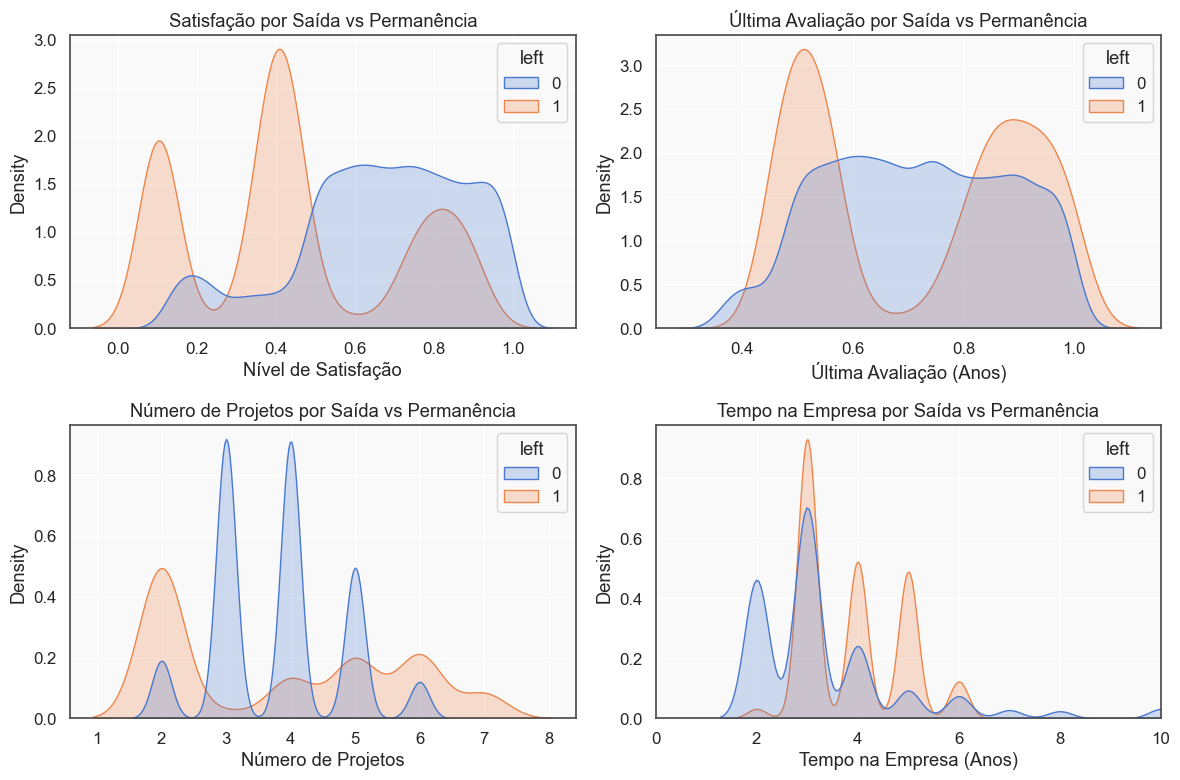

In [66]:
#Propositalmente colocada na ordem de importância baseado no resultado do modelo de árvore de decisão.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.kdeplot(data=data_filtered, x='satisfaction_level', hue='left', common_norm=False, ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Satisfação por Saída vs Permanência')
axes[0, 0].set_xlabel('Nível de Satisfação')

sns.kdeplot(data=data_filtered, x='last_evaluation', hue='left', common_norm=False, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Última Avaliação por Saída vs Permanência')
axes[0, 1].set_xlabel('Última Avaliação (Anos)')

sns.kdeplot(data=data_filtered, x='number_project', hue='left', common_norm=False, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Número de Projetos por Saída vs Permanência')
axes[1, 0].set_xlabel('Número de Projetos')

sns.kdeplot(data=data_filtered, x='time_spend_company', hue='left', common_norm=False, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Tempo na Empresa por Saída vs Permanência')
axes[1, 1].set_xlabel('Tempo na Empresa (Anos)')
axes[1, 1].set_xlim(0,10)  # Limitar o eixo x para melhor visualização

plt.tight_layout()
plt.show()
#Usado o parametro 'density' para normalizar a quantidade, tornando a comparação mais justa entre os grupos.


**1. Satisfação (satisfaction_level)**

- Funcionários que saíram (left = 1) tendem a ter níveis de satisfação mais baixos, com picos entre 0.1 e 0.4.
- Já os que ficaram (left = 0) têm maior concentração entre 0.6 e 0.8, sugerindo que a baixa satisfação é um fator relevante para saída.

**2. Última Avaliação (last_evaluation)**

Ambos os grupos apresentam distribuições bimodais, mas:

- Funcionários que saíram têm maior densidade nos extremos (avaliações muito baixas ou altas).

- Funcionários que ficaram concentram-se em avaliações intermediárias, indicando que extremos podem estar associados à rotatividade (baixo desempenho ou burnout?).

**3. Número de Projetos (number_project)**

- Funcionários que ficaram têm mais densidade em 3 a 5 projetos.

- Já os que saíram estão mais nos extremos (principalmente com 2 ou 6+ projetos).

- Pode indicar que pouco engajamento ou sobrecarga contribuem para a saída.

**4. Tempo na Empresa (time_spend_company)**

- Funcionários que saíram tendem a ter picos em 3, 4 e 6 anos.

- Já os que ficaram estão mais concentrados entre 2 e 3 anos.

- Isso pode sugerir que há um ponto crítico ao redor dos 3–6 anos em que muitos funcionários decidem sair, talvez por estagnação ou falta de crescimento.

#### **Visão geral:**
- **Baixa satisfação**, **extremos em avaliação** e **número de projetos**, e **tempo prolongado na empresa** são sinais que aumentam a probabilidade de saída.

- Há uma curva de risco que mistura insatisfação, sobrecarga e tempo acumulado.

💡 A partir disso vamos ver os fatores que estariam afetando os funcionários que estão com determinado nível de satisfação, e também avaliação.

In [67]:
#Usar o dataset principal poder olhar outras variáveis.
lower_satisfaction_df = data[data['satisfaction_level'] < 0.6 ]
lower_satisfaction_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros
5,0.41,0.50,2,153,3,0,1,0,sales,low,Outros
6,0.10,0.77,6,247,4,0,1,0,sales,low,4 anos
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,Outros
14995,0.37,0.48,2,160,3,0,1,0,support,low,Outros
14996,0.37,0.53,2,143,3,0,1,0,support,low,Outros
14997,0.11,0.96,6,280,4,0,1,0,support,low,4 anos


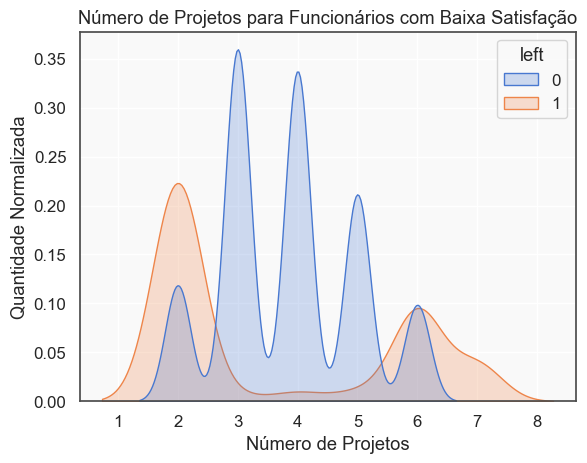

In [68]:
sns.kdeplot(data=lower_satisfaction_df, x='number_project', hue='left', fill=True)
plt.title('Número de Projetos para Funcionários com Baixa Satisfação')
plt.xlabel('Número de Projetos')
plt.ylabel('Quantidade Normalizada')
plt.show()

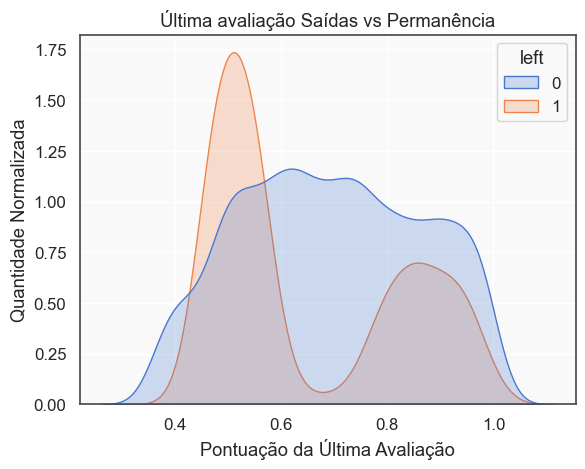

In [69]:
sns.kdeplot(data=lower_satisfaction_df, x='last_evaluation', hue='left', fill=True)
plt.title('Última avaliação Saídas vs Permanência')
plt.xlabel('Pontuação da Última Avaliação')
plt.ylabel('Quantidade Normalizada')
plt.show()

Podemos ver que há uma tendência de baixo desempenho nos funcionários com nível de satisfação baixo, fazendo sentido com a ideia de estarem desmotivados.

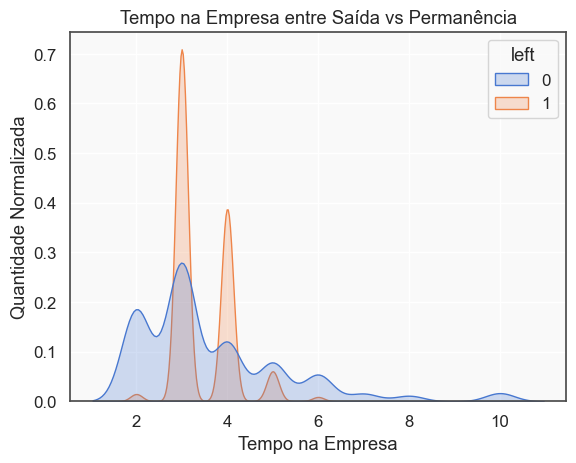

In [70]:
sns.kdeplot(data=lower_satisfaction_df, x='time_spend_company', hue='left', fill=True)
plt.title('Tempo na Empresa entre Saída vs Permanência')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Quantidade Normalizada')
plt.show()

Como a grande maioria dos funcionários que saem estão entre 2 e 4 anos de empresa, vamos experimentar ver do ponto de vista desses funcionários o que tem acontecido, por mais que já tenhamos visto um padrão do pessoal com 4 anos de empresa, talvez seja possível identificar mais insights desses colaboradores.

In [71]:
less_four_years = data[data['time_spend_company'] <= 4]
other_years_df = data[data['time_spend_company'] > 4]

In [72]:
less_four_years.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros
5,0.41,0.50,2,153,3,0,1,0,sales,low,Outros
6,0.10,0.77,6,247,4,0,1,0,sales,low,4 anos


In [73]:
other_years_df['time_spend_company'].unique()

array([ 6,  5,  8, 10,  7])

In [74]:
less_four_years['time_spend_company'].unique()

array([3, 4, 2])

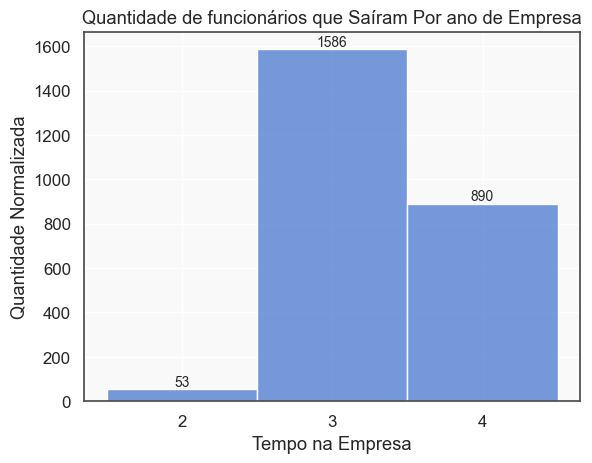

In [75]:
ax = sns.histplot(
    data=less_four_years[less_four_years['left'] == 1],
    x='time_spend_company',
    bins=[1.5, 2.5, 3.5, 4.5],  # cada barra centrada em 2, 3, 4
    discrete=False,
    fill=True
)
plt.xticks([2, 3, 4], ['2', '3', '4'])
plt.title('Quantidade de funcionários que Saíram Por ano de Empresa')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Quantidade Normalizada')

# Adiciona o valor acima de cada barra
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, fontweight='light')


plt.show()

Como agora sabemos que maior parte dos funcionários que saíram possuem 3 e 4 anos de empresa, vamos filtrar novamente o dataset contendo apenas esses funcionários e tentar achar algumas tendências:

In [76]:
less_four_years.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros
5,0.41,0.50,2,153,3,0,1,0,sales,low,Outros
6,0.10,0.77,6,247,4,0,1,0,sales,low,4 anos


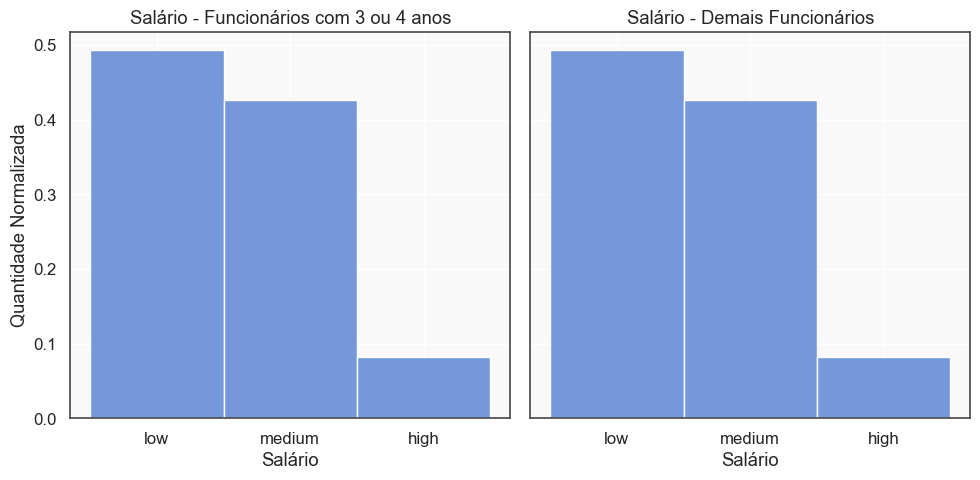

In [77]:
#Como será o salário desses funcionários?
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

# Boxplot para 3 e 4 anos
sns.histplot(data=less_four_years, x='salary', ax=axes[0], stat='density', multiple='stack')
axes[0].set_title('Salário - Funcionários com 3 ou 4 anos')
axes[0].set_xlabel('Salário')
axes[0].set_ylabel('Quantidade Normalizada')

# Boxplot para os demais
sns.histplot(data=less_four_years, x='salary', ax=axes[1], stat='density' , multiple='stack')
axes[1].set_title('Salário - Demais Funcionários')
axes[1].set_xlabel('Salário')
axes[1].set_ylabel('Quantidade Normalizada')

plt.tight_layout()
plt.show()

Comparando a quantidade normalizada de funcionários segmentados pelos seus níveis de salários, não parecem de fato ser um fator que impacta visto que há uma grande semelhança entre os 2 grupos.

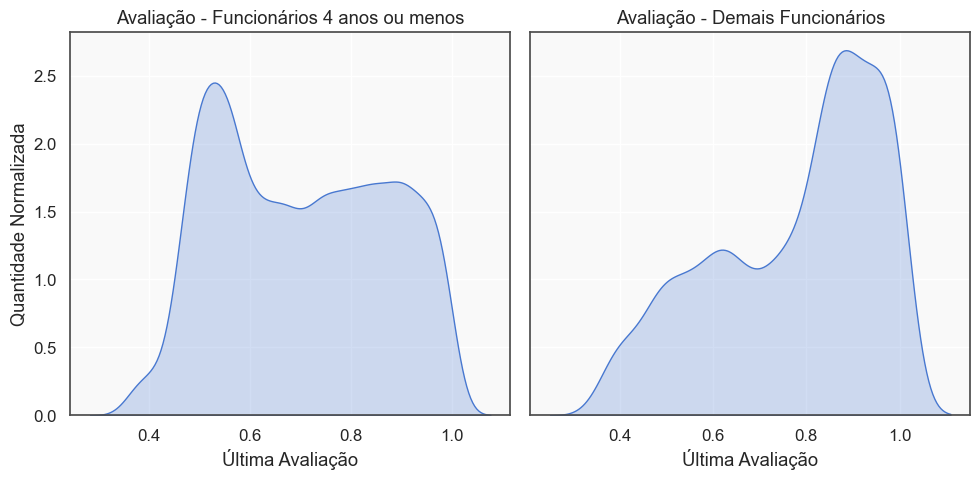

In [78]:
#Como será o salário desses funcionários?
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

# Boxplot para 3 e 4 anos
sns.kdeplot(data=less_four_years, x='last_evaluation', ax=axes[0], fill=True )
axes[0].set_title('Avaliação - Funcionários 4 anos ou menos')
axes[0].set_xlabel('Última Avaliação')
axes[0].set_ylabel('Quantidade Normalizada')

# Boxplot para os demais
sns.kdeplot(data=other_years_df, x='last_evaluation', ax=axes[1], fill=True)
axes[1].set_title('Avaliação - Demais Funcionários')
axes[1].set_xlabel('Última Avaliação')
axes[1].set_ylabel('Quantidade Normalizada')

plt.tight_layout()
plt.show()

O pico nas avaliações de menor pontuação, deixa mais claro como esse grupo está sem motivação.

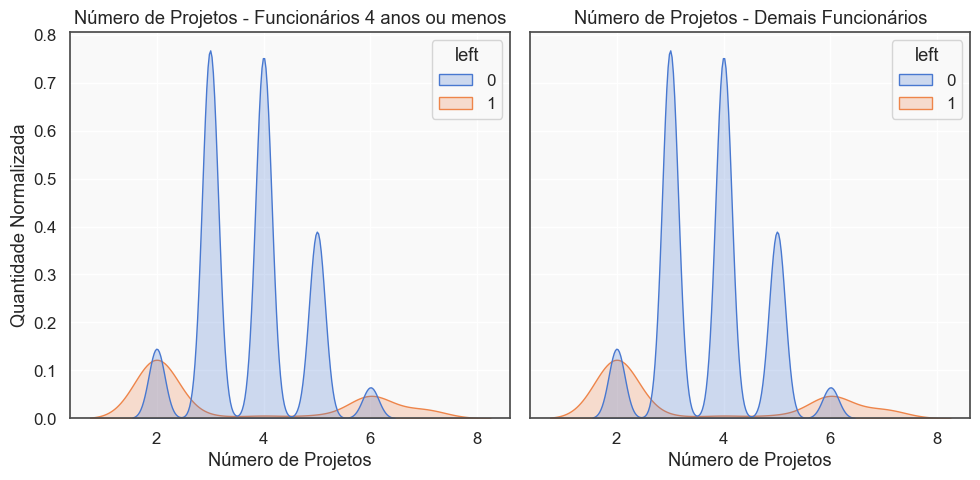

In [79]:
#Como será o salário desses funcionários?
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

# Boxplot para 3 e 4 anos
sns.kdeplot(data=less_four_years, x='number_project', ax=axes[0], fill=True, hue='left')
axes[0].set_title('Número de Projetos - Funcionários 4 anos ou menos')
axes[0].set_xlabel('Número de Projetos')
axes[0].set_ylabel('Quantidade Normalizada')


# Boxplot para os demais
sns.kdeplot(data=less_four_years, x='number_project', ax=axes[1], fill=True, hue='left')
axes[1].set_title('Número de Projetos - Demais Funcionários')
axes[1].set_xlabel('Número de Projetos')
axes[1].set_ylabel('Quantidade Normalizada')

plt.tight_layout()
plt.show()

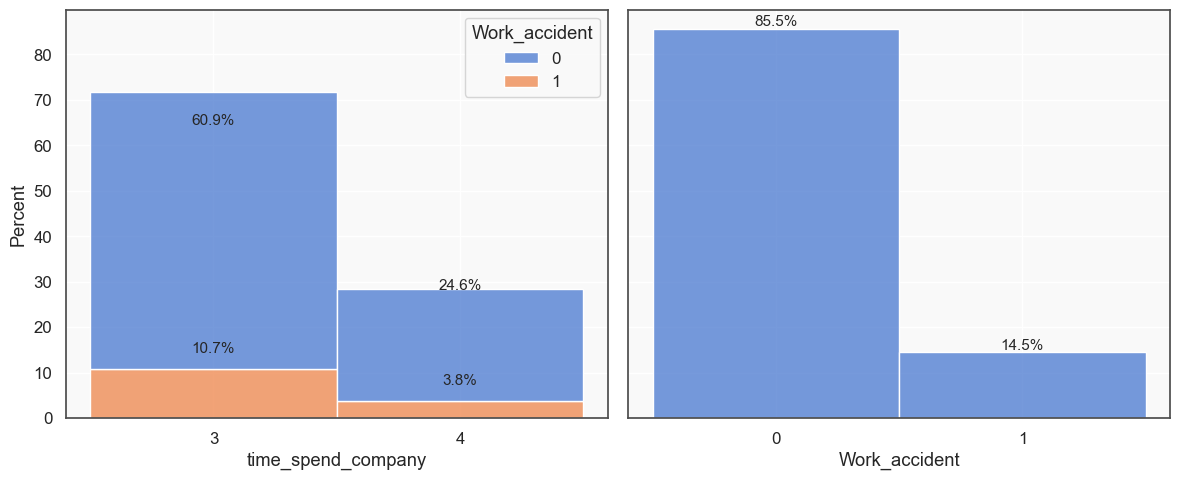

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
#Comparando a quantidade de acidentes por ano de empresa.
sns.histplot(data=less_four_years, x='time_spend_company', hue='Work_accident', multiple='stack', stat='percent', ax=axes[0], bins=[2.5, 3.5, 4.5])
axes[0].set_xticks((3,4))

for patch in axes[0].patches:
    height = patch.get_height()
    if height > 0:
        axes[0].text(
            patch.get_x() + patch.get_width() / 2,
            height + 3,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11
        )


sns.histplot(data=less_four_years, x='Work_accident', ax=axes[1], bins=[-0.5, 0.5, 1.5], stat='percent')
axes[1].set_xticks((0,1))

# Adicionando rótulos no gráfico da direita
for patch in axes[1].patches:
    height = patch.get_height()
    if height > 0:
        axes[1].text(
            patch.get_x() + patch.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.tight_layout()
plt.show()

🤔💭Vamos investigar também outros funcionários (sem contar os com 3 e 4 anos de empresa, algumas características)

In [81]:
other_years_df[other_years_df['left']==1].shape

(1042, 11)

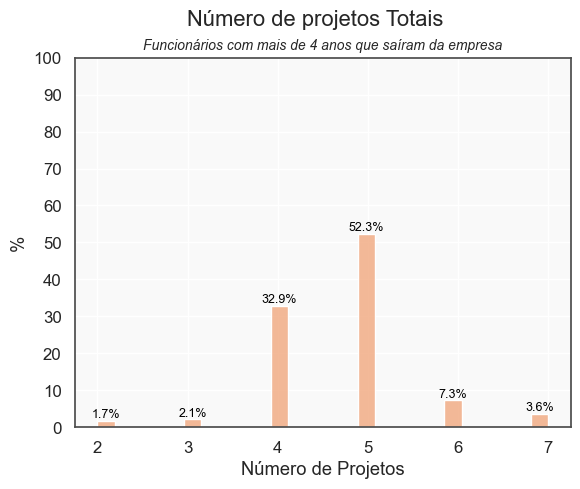

In [82]:

ax = sns.histplot(data=other_years_df[other_years_df['left']==1], x='number_project', color="#f0a276", stat='percent')
# Adicionar rótulos de dados (valores) em cada barra
for p in ax.patches:
    height = p.get_height()  # Altura da barra = valor da contagem
    if height > 0:  # Só adiciona rótulo se a barra não for vazia
        ax.annotate(
            f"{height:.1f}%",  # Texto do rótulo (formato inteiro)
            (p.get_x() + p.get_width() / 2, height),  # Posição (centro da barra)
            ha="center",  # Alinhamento horizontal
            va="bottom",  # Alinhamento vertical
            fontsize=9,
            color="black"
        )

plt.yticks(range(0,110,10))
plt.suptitle("Número de projetos Totais")
plt.title("Funcionários com mais de 4 anos que saíram da empresa", fontsize=10, fontstyle='italic')
plt.xlabel("Número de Projetos")
plt.ylabel("%")
plt.show()

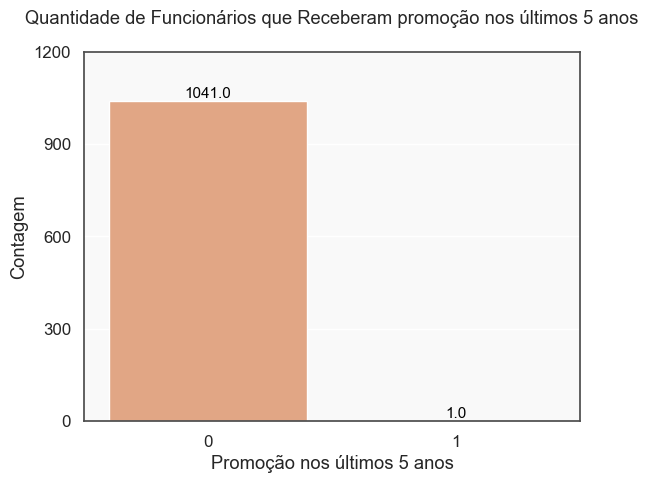

In [83]:
#Com relação aos outros funcionários, vamos verificar como está a promoção nos últimos 5 anos, daqueles que saíram:
ax = sns.barplot(data= other_years_df[other_years_df['left']==1].groupby('promotion_last_5years').agg({'promotion_last_5years':'count'}) \
    .rename(columns={'promotion_last_5years': 'Contagem'}).reset_index(), x='promotion_last_5years', y='Contagem', color="#f0a276")
for p in ax.patches:
    height = p.get_height()  # Altura da barra = valor da contagem
    if height > 0:  # Só adiciona rótulo se a barra não for vazia
        ax.annotate(
            f"{height}",  # Texto do rótulo (formato inteiro)
            (p.get_x() + p.get_width() / 2, height),  # Posição (centro da barra)
            ha="center",  # Alinhamento horizontal
            va="bottom",  # Alinhamento vertical
            fontsize=11,
            color="black"
        )

plt.xlabel("Promoção nos últimos 5 anos")
plt.yticks(range(0,1300, 300))
plt.title("Quantidade de Funcionários que Receberam promoção nos últimos 5 anos", pad=20.0)
plt.show()

Dos funcionários que estão a mais de 4 anos na empresa, nenhum deles recebeu uma promoção nos últimos 5 anos. Isso explicaria uma possível saída desses funcionários.

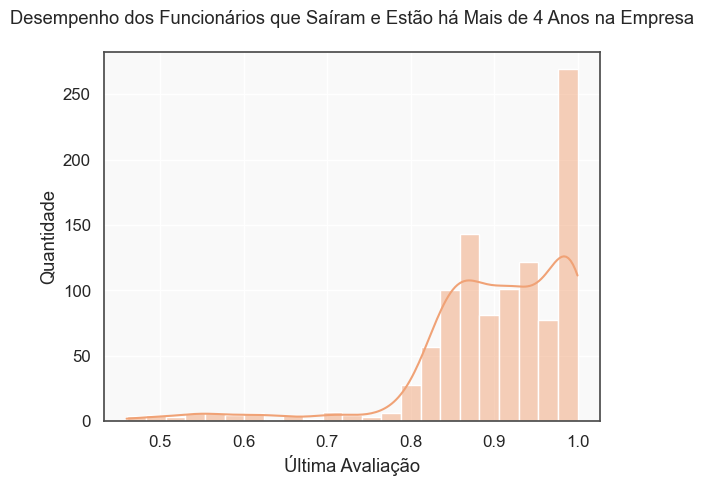

In [84]:
sns.histplot(data=other_years_df[other_years_df['left']==1], x='last_evaluation', fill=True, color="#f0a276", kde=True)
plt.title("Desempenho dos Funcionários que Saíram e Estão há Mais de 4 Anos na Empresa", pad=20)
plt.xlabel("Última Avaliação")
plt.ylabel("Quantidade")
plt.show()

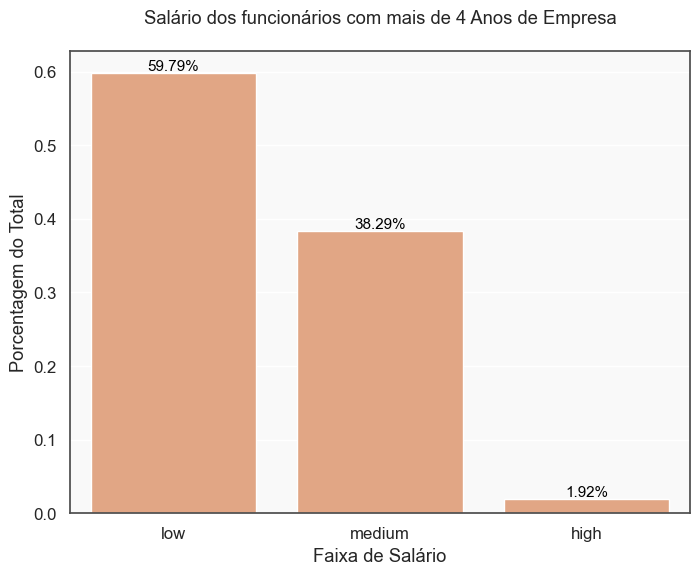

In [85]:
# Calcular a proporção de cada salário entre os funcionários que saíram e têm mais de 4 anos de empresa
temp = (
    other_years_df[other_years_df['left'] == 1]
    .groupby('salary')
    .size()
    .reset_index(name='Contagem').sort_values(by='Contagem', ascending=False)
)
temp['Proporcao'] = temp['Contagem'] / temp['Contagem'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(data=temp, x='salary', y='Proporcao', color='#f0a276')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.2%}",
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=11,
            color="black"
        )
plt.title("Salário dos funcionários com mais de 4 Anos de Empresa", pad=20)
plt.ylabel("Porcentagem do Total")
plt.xlabel("Faixa de Salário")
plt.show()


#### A pergunta final a ser respondida é: Qual seria o impacto causado, para o caso de a empresa solucionar todas as questões citadas:

- Número de projetos entre 3-5 tentando equilibrar de maneira geral
- Promoção ou reajuste salarial para os funcionários com mais de 5 anos na empresa e desempenho acima de 0.7

Pra isso, será utilizado os funcionários que possuem mais risco de sair, afinal aqueles que saíram já não são possível de recuperação

In [87]:
data_subset.shape

(14999, 10)

In [100]:
# Primeiro filtramos os funcionários que ainda estão na empresa do dataset original
func_atuais = data[data['left'] == 0]
func_atuais.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
2000,0.58,0.74,4,215,3,0,0,0,sales,low,Outros
2001,0.82,0.67,2,202,3,0,0,0,sales,low,Outros
2002,0.45,0.69,5,193,3,0,0,0,sales,low,Outros
2003,0.78,0.82,5,247,3,0,0,0,sales,low,Outros
2004,0.49,0.60,3,214,2,0,0,0,sales,low,Outros


In [101]:
#Vamos manter apenas as colunas que interessam
func_atuais = func_atuais.drop(columns=['Department', 'group_4_years'])

In [141]:
#Agora vamos filtrar baseado nas condições que identificamos serem as cruciais pra identificar funcionários de risco.
filtros_risco = (
    # 1. Baixa satisfação
    (func_atuais['satisfaction_level'] < 0.6)
    
    # 2. Número de projetos fora da faixa ideal (1-2 ou >5)
    | (func_atuais['number_project'] < 3)
    | (func_atuais['number_project'] > 5)

    # 3. ≥4 anos sem promoção
    | ((func_atuais['time_spend_company'] >= 4) & (func_atuais['promotion_last_5years'] == 0))

    # 4. ≥4 anos, avaliação alta, salário não high
    | (
        (func_atuais['time_spend_company'] >= 4) &
        (func_atuais['last_evaluation'] > 0.8) &
        (func_atuais['salary'] != 'high')
    )
)
func_atuais[filtros_risco]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
2000,0.58,0.74,4,215,3,0,0,0,low
2001,0.82,0.67,2,202,3,0,0,0,low
2002,0.45,0.69,5,193,3,0,0,0,low
2004,0.49,0.60,3,214,2,0,0,0,low
2005,0.36,0.95,3,206,4,0,0,0,low
...,...,...,...,...,...,...,...,...,...
14201,0.49,0.49,4,212,7,0,0,0,medium
14202,0.60,0.53,2,235,7,0,0,0,medium
14205,0.22,0.94,3,193,10,0,0,1,high
14209,0.33,0.65,3,172,10,0,0,1,high


In [120]:
#Vamos comparar percentualmente agora do total de funcionários ativos, quantos podem estar em risco.
print( "Total de Funcionários: ", len(func_atuais))
print("Quantidade de Funcionários em Risco: ", len(func_atuais[filtros_risco] ) )
print(f"Porcentagem dos Funcionários em risco:  {(len(func_atuais[filtros_risco] ) / len(func_atuais)) *100:.2f} %")

Total de Funcionários:  11428
Quantidade de Funcionários em Risco:  6074
Porcentagem dos Funcionários em risco:  53.15 %


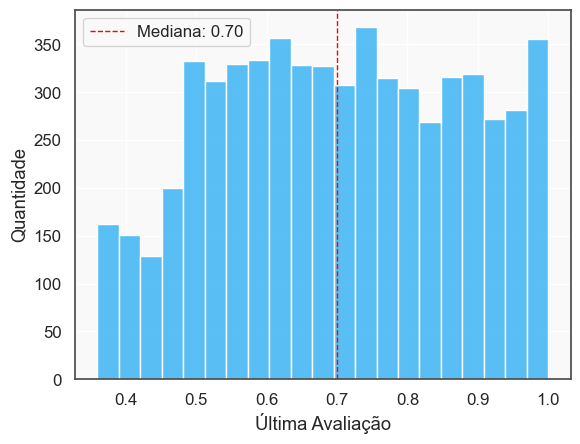

In [156]:
mediana = func_atuais[filtros_risco]['last_evaluation'].median()
sns.histplot(data=func_atuais[filtros_risco], x='last_evaluation', fill=True, color="#23aaf2")
plt.axvline(mediana, color='red', linestyle='--', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.xlabel("Última Avaliação")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

In [127]:
# Agora vamos estimar a quantidade de funcionários que poderiam ser mantidos, dos que já saíram.
func_sairam = data[data['left'] == 1]
func_sairam = func_sairam.drop(columns=['Department', 'group_4_years'])
func_sairam.shape
# Vê-se que o total de funcionários que saíram é igual a 3571.

(3571, 9)

In [129]:
#Agora usando o mesmo filtro criado anteriormente
filtros_risco = (
    # 1. Baixa satisfação
    (func_sairam['satisfaction_level'] < 0.6)
    
    # 2. Número de projetos fora da faixa ideal (1-2 ou >5)
    | (func_sairam['number_project'] < 3)
    | (func_sairam['number_project'] > 5)

    # 3. ≥4 anos sem promoção
    | ((func_sairam['time_spend_company'] >= 4) & (func_sairam['promotion_last_5years'] == 0))

    # 4. ≥4 anos, avaliação alta, salário não high
    | (
        (func_sairam['time_spend_company'] >= 4) &
        (func_sairam['last_evaluation'] > 0.8) &
        (func_sairam['salary'] != 'high')
    )
)
func_sairam[filtros_risco]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [139]:
#Agora vamos ver qual a % dos funcionários poderiam ser mantidos, caso as ações recomendadas fossem tomadas:
print(f"Total de funcionários que saíram: {len(func_sairam)}")
print(f"Funcionários que na teoria era possível ser mantidos: {len(func_sairam[filtros_risco])}")
print(f"Em Porcentagem os funcionários que poderiam ser mantidos:  {(len(func_sairam[filtros_risco] ) / len(func_sairam)) *100:.2f} %")
print(f"O que significa que {len(func_sairam) - len(func_sairam[filtros_risco])} deles, saíram por outros motivos")

Total de funcionários que saíram: 3571
Funcionários que na teoria era possível ser mantidos: 3547
Em Porcentagem os funcionários que poderiam ser mantidos:  99.33 %
O que significa que 24 deles, saíram por outros motivos
